In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.metrics import classification_report

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.neighbors import KNeighborsClassifier

##########데이터 로드

fish_df = pd.read_csv('./data/fish_pre.csv')
labels = ['빙어','도미']

##########데이터 분석

##########데이터 전처리

y_target = fish_df['Label']
X_data = fish_df.drop(['Label'],axis=1)

x_train, x_test, y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=42,stratify=y_target)

print(x_train.head())


##########모델 생성

model = KNeighborsClassifier()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(f'훈련_Accuracy: {model.score(x_train, y_train)}') 
print(f'테스트_Accuracy: {model.score(x_test, y_test)}') 

#평가 리포트
y_predict = model.predict(x_test)
print(classification_report(y_test,y_predict,target_names=labels))

##########모델 예측

x_test = np.array([
    # [31.5, 496] # 도미
    [25,150]
])

y_predict = model.predict(x_test)
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(f'분류결과:{label} {confidence}')

      길이     무게
16  33.5  610.0
31  41.0  975.0
30  39.5  925.0
4   29.0  430.0
38  11.3    8.7
훈련_Accuracy: 1.0
테스트_Accuracy: 1.0
              precision    recall  f1-score   support

          빙어       1.00      1.00      1.00         4
          도미       1.00      1.00      1.00        11

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

분류결과:빙어 1.0


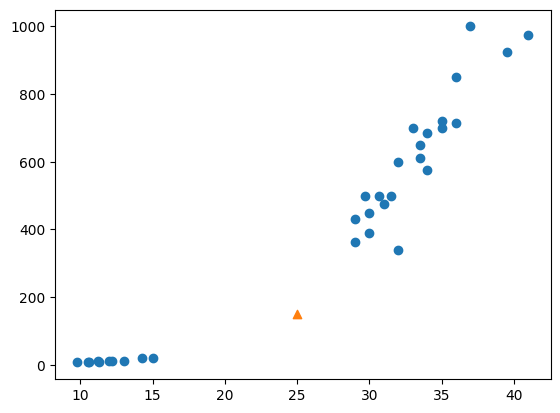

In [2]:
import matplotlib.pyplot as plt

#스케터 차트그리기
plt.scatter(x_train['길이'],x_train['무게'])
plt.scatter(25,150,marker='^')
plt.show()

> * 빙어라고 판단됐지만, 실제는 도미이네~~~
> * 어떻게 된거지?

> * 분명히 새로운 데이터는 도미쪽에 가까우나,
> * 모델의 판단은 빙어라고 판단했는데 왜 이런 현상이 벌어질까요??????

In [3]:
# 주변샘플을 살펴보면
dist, indexes = model.kneighbors([[25,150]])
indexes

array([[25, 31, 23, 14,  8]], dtype=int64)

In [4]:

idx = indexes.tolist()[0]
idx


[25, 31, 23, 14, 8]

In [5]:
kne = x_train.iloc[idx]
kne

,길이,무게
46,15.0,19.9
45,14.3,19.7
44,13.0,12.2
42,12.2,12.2
41,12.0,9.8


In [6]:
y_train.iloc[idx] 
# K-최근접 모델이 훈련하고, 새로운 데이터에 대해서 최근점 이웃인 5개 데이터를 바탕으로 판단한 결과
# 빙어가 5마리가 대상이 되고 다수결에 따라 빙어로 판단함.

46    0
45    0
44    0
42    0
41    0
Name: Label, dtype: int64

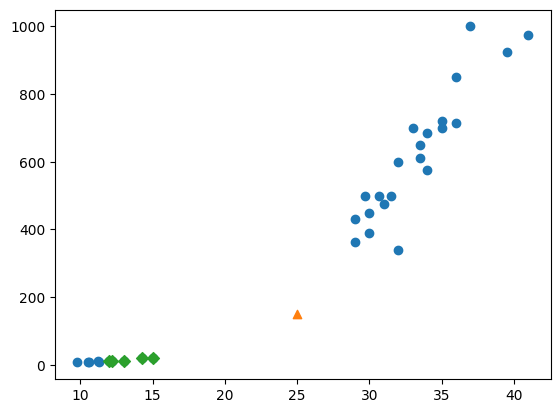

In [7]:
#스케터 차트그리기
plt.scatter(x_train['길이'],x_train['무게']) #훈련데이터
plt.scatter(25,150,marker='^')              # 새로운 데이터
plt.scatter(kne['길이'],kne['무게'], marker='D') # 근접 이웃인 데이터 5개
plt.show()

 > * X축의 범위는 10~40이고, y축의 범위는 0~1000사이 입니다. 
 > * 스케일이 다르니 y축으로 조금만 이동을 해도 거리가 아주 큰 값으로 계산됩니다. 
 > * 따라서, 각 축의 범위를 동일하게 맞춰줘야 합니다. 